In [3]:
from scrapper import get_data

In [17]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.neural_network import MLPClassifier

stemmer = SnowballStemmer("portuguese")

In [7]:
# loads the data
lyrics = get_data()

https://www.vagalume.com.br/suricato
https://www.vagalume.com.br/sabonetes
https://www.vagalume.com.br/capital-inicial
https://www.vagalume.com.br/skank
https://www.vagalume.com.br/super-combo
https://www.vagalume.com.br/anitta
https://www.vagalume.com.br/mc-livinho
https://www.vagalume.com.br/ludmilla
https://www.vagalume.com.br/mc-kevinho
https://www.vagalume.com.br/mc-daleste
https://www.vagalume.com.br/jorge-e-mateus
https://www.vagalume.com.br/marilia-mendonca
https://www.vagalume.com.br/henrique-e-juliano
https://www.vagalume.com.br/matheus-e-kauan
https://www.vagalume.com.br/ze-neto-e-cristiano


In [8]:
# defines a tokenizer to stem the words and parse words in tokens
def tokenizer(lyric):
    tokens = tokenize.word_tokenize(lyric, language='portuguese')
    tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('portuguese')]
    
    return tokens

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
n_features=20

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=.1,
                                   #max_features=n_features,
                                   tokenizer=tokenizer)

# creates a matrix that evaluates the importance of a word in a lyric
tfidf = tfidf_vectorizer.fit_transform([lyric for lyric, label in lyrics])

In [14]:
len(tfidf.toarray())

60

In [15]:
# dont forget, this is how to get the word names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names

["''",
 '(',
 ')',
 ',',
 '.',
 '...',
 '2x',
 '``',
 'acab',
 'acontec',
 'acredit',
 'adiant',
 'agor',
 'aind',
 'alguém',
 'amanhã',
 'amig',
 'amor',
 'aqu',
 'assim',
 'avis',
 'bat',
 'beij',
 'bem',
 'cabel',
 'cad',
 'car',
 'cas',
 'caus',
 'cham',
 'cheg',
 'chor',
 'cois',
 'comig',
 'conhec',
 'cont',
 'coraçã',
 'corp',
 'danc',
 'deix',
 'dess',
 'dia',
 'diz',
 'dá',
 'entã',
 'esper',
 'esquec',
 'estar',
 'fac',
 'fal',
 'faz',
 'fic',
 'fim',
 'frent',
 'fri',
 'gent',
 'gost',
 'gostos',
 'hoj',
 'hor',
 'import',
 'jeit',
 'lad',
 'lembr',
 'lev',
 'lig',
 'lug',
 'lá',
 'mal',
 'mand',
 'mar',
 'med',
 'melhor',
 'menin',
 'ment',
 'mes',
 'mim',
 'mostr',
 'mulh',
 'mund',
 'mã',
 'nad',
 'namor',
 'ness',
 'ninguém',
 'noit',
 'nom',
 'nov',
 'nunc',
 'olhar',
 'olhos',
 'onde',
 'ouv',
 'par',
 'part',
 'pass',
 'pec',
 'peg',
 'pens',
 'perd',
 'pod',
 'porqu',
 'port',
 'poss',
 'pouc',
 'pra',
 'precis',
 'qualqu',
 'quant',
 'quer',
 'quis',
 'rua',
 'sab',

In [21]:
input_mlp = tfidf.toarray()
expected_output = [ l[1] for l in lyrics]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_mlp, expected_output, test_size=0.33)

In [25]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [30]:
y_predicted = clf.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predicted, labels=[0,1,2])

Text(0.5,-15.9238,'Classe Prevista')

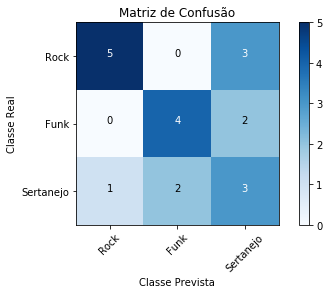

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

classes = ["Rock", "Funk", "Sertanejo"]
plt.imshow(conf_matrix, interpolation='nearest',cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

cm = conf_matrix
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')